In [1]:
import pandas as pd

# Load the training labels
train_labels = pd.read_csv('../data/train_labels.csv')

# --- Create a 5% sample of customer_IDs ---
# Get a list of all unique customer IDs
all_customers = train_labels['customer_ID'].unique()

# Create a smaller, random sample of these IDs
sampled_customers = pd.Series(all_customers).sample(frac=0.05, random_state=42)

# Now, we will read the huge train_data.csv file in chunks
# and only keep the rows for our sampled customers.
chunk_size = 1000000
reader = pd.read_csv('../data/train_data.csv', chunksize=chunk_size)

# Create an empty list to store the filtered chunks
filtered_chunks = []

# Loop through the chunks
for chunk in reader:
    # Filter the chunk to only include customers in our sample
    filtered_chunk = chunk[chunk['customer_ID'].isin(sampled_customers)]
    filtered_chunks.append(filtered_chunk)
    print(f"Processed a chunk of size {len(chunk)}")

# Concatenate the filtered chunks into a single DataFrame
train_sample_df = pd.concat(filtered_chunks)

print(f"Finished. The sampled DataFrame has {len(train_sample_df)} rows.")

Processed a chunk of size 1000000
Processed a chunk of size 1000000
Processed a chunk of size 1000000
Processed a chunk of size 1000000
Processed a chunk of size 1000000
Processed a chunk of size 531451
Finished. The sampled DataFrame has 277266 rows.


In [2]:
train_sample_df.shape

(277266, 190)

In [3]:
train_sample_df.isnull().sum()

customer_ID         0
S_2                 0
P_2              2222
D_39                0
B_1                 0
                ...  
D_141            5011
D_142          229266
D_143            5011
D_144            2048
D_145            5011
Length: 190, dtype: int64

In [4]:
train_sample_df['customer_ID'].value_counts()

customer_ID
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286    13
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4    13
ffc997d15a06f5557adf0338e4c719165da4a9c80c3b928bdf76cd5af3dc9a48    13
ffc24fea314603eeeb32330574c1624ae7dccda55243368437c026249e07fc6b    13
ffc1a7f0453c3d8f9904d8eeac0118f313e4730fce92f39ebc7c168d10ed3d68    13
                                                                    ..
2f1a5ddc1cead45e90a3df577caf10d4cffa3a315693eb750e751d7f66ecdb9a     1
d9fd323658546ff5eec8f2e47baa8b284e44362c1a5bb8ab84467e17c0ea6cff     1
2efcc5ede3c1ead689818e4731b3ce3b672061ec4595faf81662297b821fabdb     1
fff845a9c5e9206a7f783640085531e10d6a9e54c2f1ccdeb3d2f98480027079     1
ff96304446aae6bbcd1bd2e093d8c5d779c8905eea97e04582da46451408bac9     1
Name: count, Length: 22946, dtype: int64

In [5]:
# Select only the numerical features for aggregation
numerical_cols = train_sample_df.select_dtypes(include='number').columns

# Group by customer and calculate aggregates
# This will create mean, std, min, max, and last for every numerical feature
baseline_features = train_sample_df.groupby('customer_ID')[numerical_cols].agg(['mean', 'std', 'min', 'max', 'last'])

# The column names will be hierarchical, so let's flatten them
baseline_features.columns = ['_'.join(col) for col in baseline_features.columns]

print("Baseline features created. Shape:", baseline_features.shape)
baseline_features.head()

Baseline features created. Shape: (22946, 930)


,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_144_mean,D_144_std,D_144_min,D_144_max,D_144_last,D_145_mean,D_145_std,D_145_min,D_145_max,D_145_last
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.444606,0.065085,0.328983,0.560474,0.477116,0.010394,0.014735,0.000467,0.038574,0.000467,...,0.005719,0.002498,0.001686,0.009770,0.003703,0.005654,0.002304,0.001265,0.009131,0.006274
000445609ff2a39d2dd02484899affa5696210a95f6869f26390bd26eeb3b651,0.972260,0.010865,0.949051,0.993348,0.978897,0.005031,0.003067,0.000853,0.009581,0.001221,...,0.004563,0.003056,0.000085,0.009052,0.004060,0.004215,0.002971,0.000315,0.009732,0.000315
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704029f989240c733b6d0,0.970309,0.005252,0.963991,0.980221,0.980221,0.367651,0.228621,0.001281,0.648389,0.009431,...,0.004497,0.003434,0.000179,0.009167,0.007432,0.005466,0.002915,0.000411,0.009780,0.009696
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470ff272f9409103d067f,0.953131,0.031159,0.918010,1.006598,1.006598,0.219669,0.279126,0.002253,0.976348,0.119977,...,0.004060,0.003417,0.000059,0.009935,0.004934,0.006201,0.003082,0.000516,0.009825,0.007411
0007b7b197a68e10925e2b4abf89130323ea2a87deb8ada24159a249b6010516,0.446729,0.071349,0.315054,0.554934,0.554934,0.070848,0.080831,0.000881,0.244065,0.000881,...,0.004430,0.003127,0.000277,0.008750,0.000277,0.005298,0.002985,0.000359,0.009249,0.008138


In [6]:
# --- Merge features with labels ---
# Make sure your train_labels DataFrame is loaded
train_labels = pd.read_csv('../data/train_labels.csv')
# Merge the two DataFrames on the customer_ID
model_data = baseline_features.merge(train_labels, on='customer_ID')


# --- Handle Missing Values (Simple Method) ---
# For now, we'll fill any missing values with 0. This is a basic approach we can improve later.
model_data = model_data.fillna(0)


# --- Create X (features) and y (target) ---
# X will be all columns except customer_ID and the target
X = model_data.drop(columns=['customer_ID', 'target']) 
y = model_data['target']

In [8]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
preds = model.predict_proba(X_val)[:, 1]

# Evaluate the model using AUC score
auc = roc_auc_score(y_val, preds)
print(f"Baseline Model AUC: {auc:.4f}")

[LightGBM] [Info] Number of positive: 4746, number of negative: 13610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219126
[LightGBM] [Info] Number of data points in the train set: 18356, number of used features: 926
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258553 -> initscore=-1.053503
[LightGBM] [Info] Start training from score -1.053503
Baseline Model AUC: 0.9482


In [11]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import numpy as np
# We use StratifiedKFold because the target is imbalanced
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

# X and y are from your previous data preparation steps
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    preds = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, preds)
    scores.append(auc)
    print(f"Fold {fold+1} AUC: {auc:.4f}")

print(f"\nAverage AUC across 5 folds: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

[LightGBM] [Info] Number of positive: 4746, number of negative: 13610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219159
[LightGBM] [Info] Number of data points in the train set: 18356, number of used features: 926
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258553 -> initscore=-1.053503
[LightGBM] [Info] Start training from score -1.053503
Fold 1 AUC: 0.9489
[LightGBM] [Info] Number of positive: 4747, number of negative: 13610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219172
[LightGBM] [Info] Number of data points in the train set: 18357, number of used features: 926
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258593 -> initscore=-1.053292
[LightGBM] [Info] Start training from score

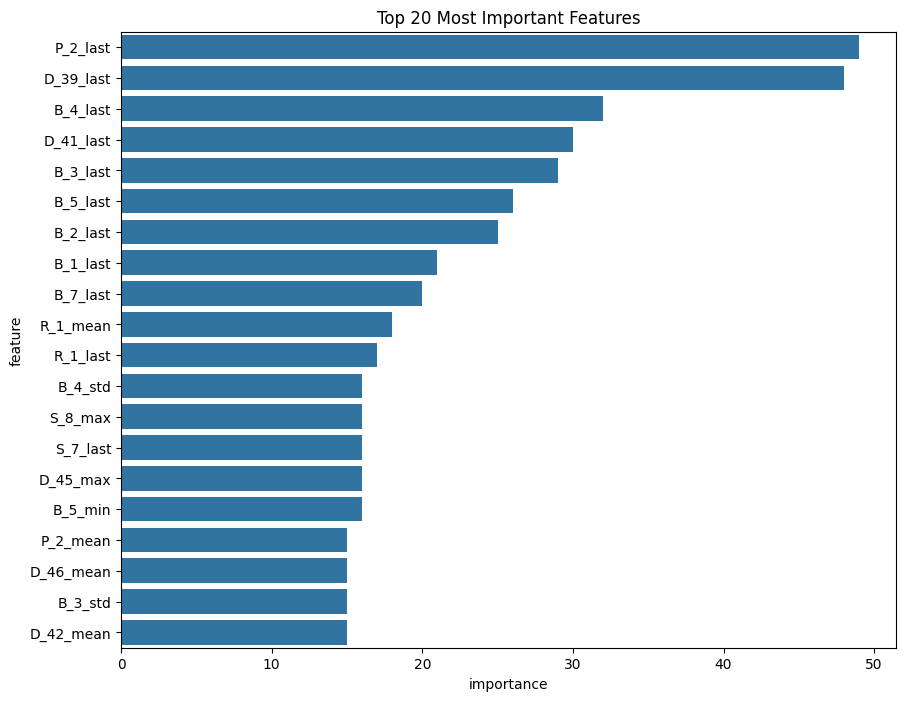

       feature  importance
4     P_2_last          49
9    D_39_last          48
59    B_4_last          32
34   D_41_last          30
39    B_3_last          29
69    B_5_last          26
19    B_2_last          25
14    B_1_last          21
104   B_7_last          20
20    R_1_mean          18


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(20))
plt.title('Top 20 Most Important Features')
plt.show()

# Display the top 10 features
print(importances.head(10))

In [13]:
# Let's use your most important feature, P_2, as an example
# Add a small number (epsilon) to avoid division by zero
epsilon = 1e-6 

# Calculate the ratio of the last value to the mean
X['P_2_last_vs_mean_ratio'] = X['P_2_last'] / (X['P_2_mean'] + epsilon)

# Calculate the difference between the last value and the mean
X['P_2_last_vs_mean_diff'] = X['P_2_last'] - X['P_2_mean']

In [15]:
# --- Step 1: Define Feature Lists ---
# We use the raw time-series dataframe (train_sample_df) for this
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
# Get all columns that are not categorical and not the customer_ID
numerical_cols = [col for col in train_sample_df.columns if col not in cat_features + ['customer_ID', 'S_2']]


# --- Step 2: Aggregate Numerical Features ---
print("Aggregating numerical features...")
num_aggregates = train_sample_df.groupby('customer_ID')[numerical_cols].agg(['mean', 'std', 'min', 'max', 'last'])
num_aggregates.columns = ['_'.join(col) for col in num_aggregates.columns]


# --- Step 3: Aggregate Categorical Features ---
print("Aggregating categorical features...")
cat_aggregates = train_sample_df.groupby('customer_ID')[cat_features].agg(['last', 'nunique'])
cat_aggregates.columns = ['_'.join(col) for col in cat_aggregates.columns]


# --- Step 4: Combine Aggregated Features ---
print("Combining feature sets...")
X = pd.concat([num_aggregates, cat_aggregates], axis=1)


# --- Step 5: One-Hot Encode the 'last' Categorical Features ---
print("One-hot encoding categorical features...")
# We encode the '_last' columns from our categorical aggregates
# Note: we are not encoding the '_nunique' columns as they are already numerical
last_cat_cols = [col for col in X.columns if col.endswith('_last') and col.replace('_last', '') in cat_features]
X = pd.get_dummies(X, columns=last_cat_cols)

print("Feature engineering complete!")

Aggregating numerical features...
Aggregating categorical features...
Combining feature sets...
One-hot encoding categorical features...
Feature engineering complete!


Data preparation complete.
Shape of final feature matrix: (22946, 940)

Starting 5-fold cross-validation...
[LightGBM] [Info] Number of positive: 4746, number of negative: 13610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217561
[LightGBM] [Info] Number of data points in the train set: 18356, number of used features: 938
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258553 -> initscore=-1.053503
[LightGBM] [Info] Start training from score -1.053503
Fold 1 AUC: 0.9489
[LightGBM] [Info] Number of positive: 4747, number of negative: 13610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 217573
[LightGBM] [Info] Number of data points in the train set: 18357, number of used features: 938
[LightGBM] [Inf

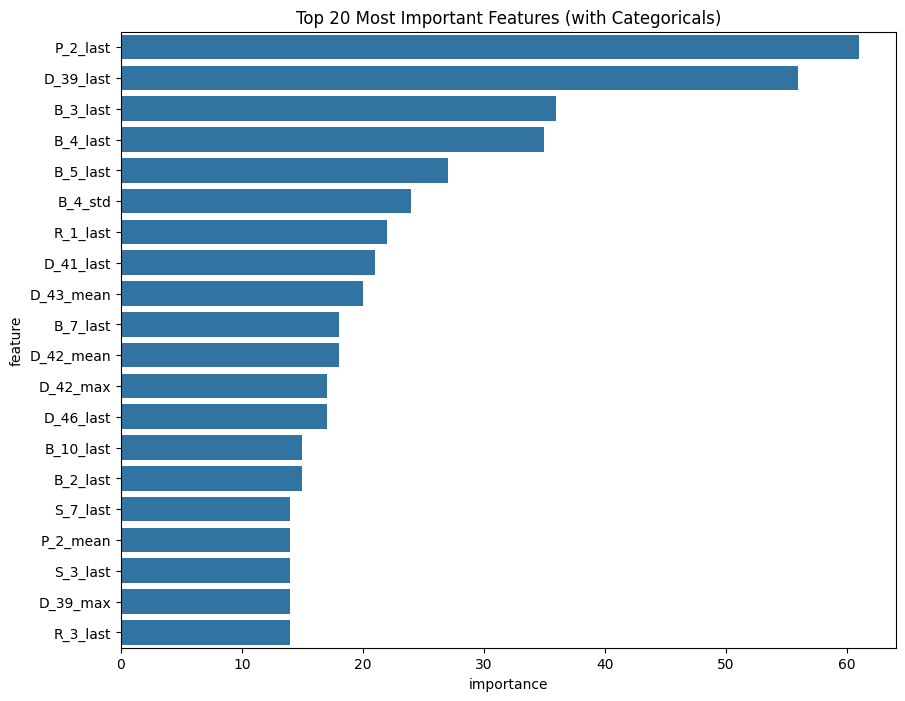


New Top 10 Features:
       feature  importance
4     P_2_last          61
9    D_39_last          56
39    B_3_last          36
59    B_4_last          35
69    B_5_last          27
56     B_4_std          24
24    R_1_last          22
34   D_41_last          21
45   D_43_mean          20
104   B_7_last          18


In [16]:
# ====================================================
# Step 1: Prepare Data for Modeling
# ====================================================


# Merge the new features with the labels
model_data = X.merge(train_labels, on='customer_ID')

# Handle missing values consistently with your baseline
# For a fair comparison, we use the same fillna(0) strategy for now.
model_data = model_data.fillna(0)

# Create the final X (features) and y (target)
X_final = model_data.drop(columns=['customer_ID', 'target']) 
y_final = model_data['target']

print("Data preparation complete.")
print(f"Shape of final feature matrix: {X_final.shape}")


# ====================================================
# Step 2: Run 5-Fold Cross-Validation
# ====================================================
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import gc

print("\nStarting 5-fold cross-validation...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_final, y_final)):
    # Get the training and validation sets for this fold
    X_train, X_val = X_final.iloc[train_idx], X_final.iloc[val_idx]
    y_train, y_val = y_final.iloc[train_idx], y_final.iloc[val_idx]
    
    # Train the model
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions and calculate AUC
    preds = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, preds)
    scores.append(auc)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    
    # Clean up memory
    del X_train, X_val, y_train, y_val, model, preds
    gc.collect()

print(f"\nNew Average AUC across 5 folds: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


# ====================================================
# Step 3: Analyze Feature Importance
# ====================================================
import matplotlib.pyplot as plt
import seaborn as sns

print("\nTraining final model on all data to get feature importances...")
# Train one last model on ALL the data to get a stable importance list
final_model = lgb.LGBMClassifier(random_state=42)
final_model.fit(X_final, y_final)

# Get and display feature importances
importances = pd.DataFrame({
    'feature': X_final.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the new top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(20))
plt.title('Top 20 Most Important Features (with Categoricals)')
plt.show()

print("\nNew Top 10 Features:")
print(importances.head(10))